# Reading Data and Importing Packages

In [1]:
!pip install wordcloud

In [62]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


from bs4 import BeautifulSoup
import re
import string
import nltk
# nltk.download()
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc,precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
#nltk.download('punkt')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


In [3]:
reviews_df = pd.read_csv(r"D:\D folder\Python\Amazon food reviews\Reviews\Reviews.csv")

# Exploratory Data Analysis

In [4]:
reviews_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


checking the missing values

In [5]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      reviews_df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [6]:
reviews_dff = reviews_df.dropna()
reviews_dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


We can see that we dont have any null values

Now we will check for duplicate values

In [8]:
dup =  reviews_df[reviews_df.duplicated(subset=['UserId', 'ProfileName', 'Time', 'Text'], keep=False)]
dup.shape

(232415, 10)

In [9]:
# example for duplicate entry
# 'AR5J8UI46CURR'
dup[dup['UserId'] == 'A395BORC6FGVXV']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
136303,136304,B002Y7526Y,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
544172,544173,B000U9WZ54,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


we will keep only first entry and delete duplicate rows

In [10]:
df = reviews_df.drop_duplicates(subset=['UserId', 'ProfileName', 'Time', 'Text'], keep='first', inplace =False)
# df.shape

In [ ]:
df.shape

 Analysis of reviews over time

<ipython-input-11-301058346d4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['Time'], unit='s')
C:\Users\Pratik Mulye\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


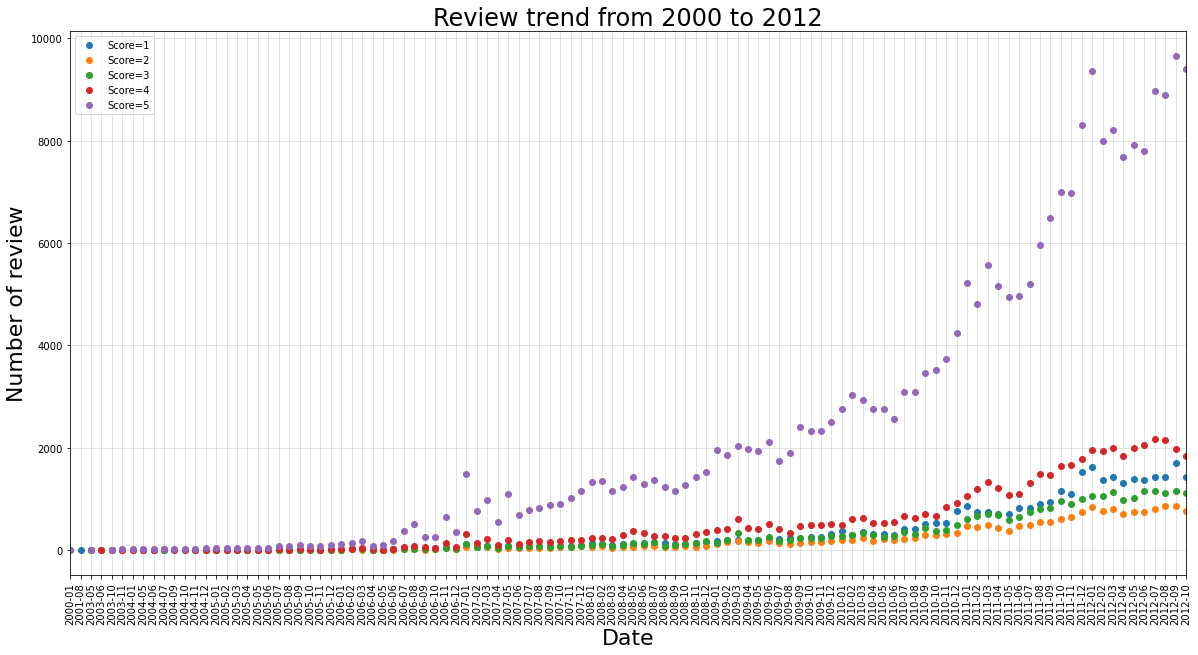

In [11]:
df['date'] = pd.to_datetime(df['Time'], unit='s')

dff = df[['date', 'Text', 'Score']]
dff.date = df.date.dt.strftime('%Y-%m')
dff = dff.sort_values(by=['date']).reset_index(drop=True)

# dff

dff_1 = dff[dff.Score == 1]
dff_2 = dff[dff.Score == 2]
dff_3 = dff[dff.Score == 3]
dff_4 = dff[dff.Score == 4]
dff_5 = dff[dff.Score == 5]

dff_1 = dff_1.groupby('date')['Score'].count().reset_index()
dff_2 = dff_2.groupby('date')['Score'].count().reset_index()
dff_3 = dff_3.groupby('date')['Score'].count().reset_index()
dff_4 = dff_4.groupby('date')['Score'].count().reset_index()
dff_5 = dff_5.groupby('date')['Score'].count().reset_index()

plt.figure(figsize=(20,10))
plt.plot_date(x=dff_1['date'],y=dff_1['Score'],label='Score=1')
plt.plot_date(x=dff_2['date'],y=dff_2['Score'],label='Score=2')
plt.plot_date(x=dff_3['date'],y=dff_3['Score'],label='Score=3')
plt.plot_date(x=dff_4['date'],y=dff_4['Score'],label='Score=4')
plt.plot_date(x=dff_5['date'],y=dff_5['Score'],label='Score=5')
plt.grid(linewidth=0.5,alpha=0.75)
plt.xticks(rotation=90)
plt.xlim('2000-01','2012-10')
plt.xlabel('Date',fontsize=22)
plt.ylabel('Number of review',fontsize=22)
plt.title('Review trend from 2000 to 2012',fontsize=24);
plt.savefig('review_trend.png')
plt.legend()
plt.show()

Analysis on Score (Target Variable)

In [ ]:
# Now we will create our target variable from review stars. Before that we will filter only those reviews with rating > 3(positive) and less than 3(negative)
df = df[df.Score !=3]
df.shape
#Checking to see how much % of data still remains
print(f'Remaining Data is {((df.shape[0]*1.0)/ (reviews_df.shape[0]*1.0))*100} %')

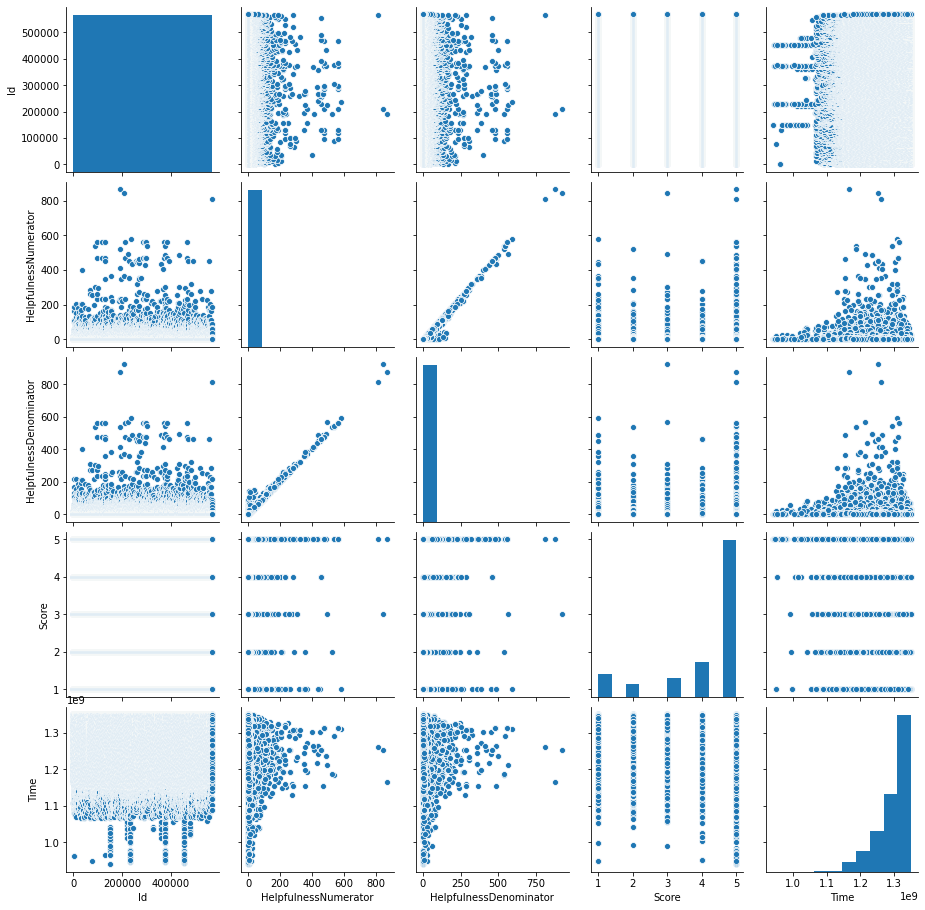

In [12]:
sns.pairplot(reviews_dff)
plt.show()

In [13]:
# Now we will create our target variable from review stars. Before that we will filter only those reviews with rating > 3(positive) and less than 3(negative)
reviews_dff = reviews_dff[reviews_dff.Score !=3]
reviews_dff.shape
#Checking to see how much % of data still remains
print(f'Remaining Data is {((df.shape[0]*1.0)/ (reviews_df.shape[0]*1.0))*100} %')

Remaining Data is 69.29901100176971 %


In [14]:
#Sentiment function on basis of score
def sentiment(x):
    if x['Score']>3:
        return 'Positive'
    elif x['Score']==3:
        return 'Neutral'
    else:
        return 'Negative'

In [15]:
reviews_dff['Sentiment']= reviews_dff.apply(sentiment, axis=1)
reviews_dff

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Positive
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,Negative
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Positive
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Positive


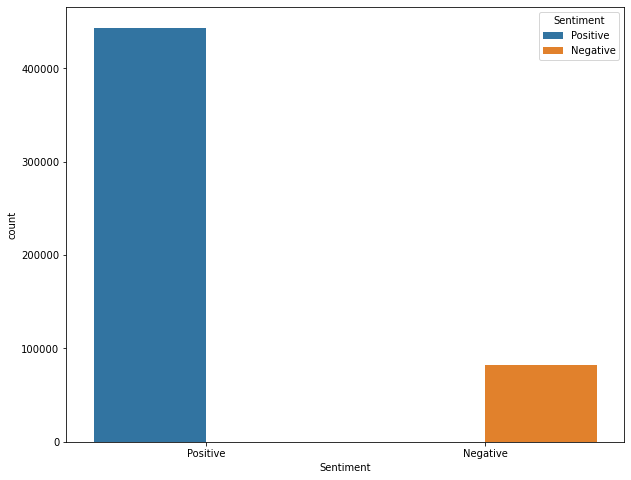

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x= 'Sentiment', hue='Sentiment', data=reviews_dff)
# plt.legend(reviews_dff.Sentiment)
plt.show()

In [17]:
score = reviews_dff['Score'].apply(lambda x: 1 if x>3 else 0)
reviews_dff['Score'] = score
reviews_dff

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,1,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Positive
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,0,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,Negative
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,1,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Positive
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,1,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Positive


In [26]:
# score = df['Score'].apply(lambda x: 1 if x > 3 else 0)
# df['Score'] = score
# df.head(3)

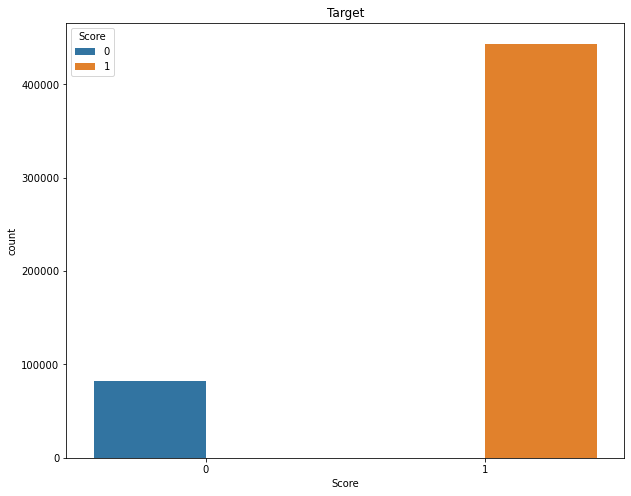

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Score', hue = 'Score', data = reviews_dff)
plt.title('Target')
plt.show()

<Figure size 360x72 with 0 Axes>

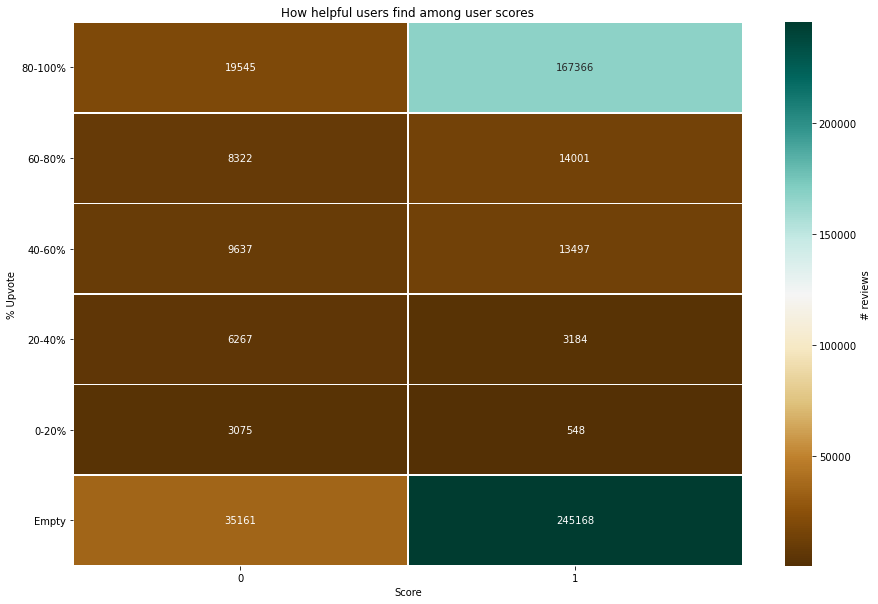

In [19]:
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages(r'D:\D folder\Python\Amazon food reviews\CM.pdf') as export_pdf:
    plt.rcParams['figure.figsize'] = 5,1
    f = plt.figure()

#How helpful does users find the reviews
    reviews_dff['Helpful %'] = np.where(reviews_dff['HelpfulnessDenominator'] > 0, reviews_dff['HelpfulnessNumerator'] / reviews_dff['HelpfulnessDenominator'], -1)
    reviews_dff['% Upvote'] = pd.cut(reviews_dff['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
    reviews_dff.head()

#Heat map
    hm = reviews_dff.groupby(['Score', '% Upvote']).agg({'Id': 'count'})
    hm = hm.unstack()
    hm.columns = hm.columns.get_level_values(1)
    fig = plt.figure(figsize=(15,10))

    sns.heatmap(hm[hm.columns[::-1]].T, cmap = 'BrBG', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
    plt.yticks(rotation=0)
    plt.title('How helpful users find among user scores')

    f.savefig("Heatmap.pdf", format = 'pdf')
    export_pdf.savefig()

Observation: It is clear that we have an imbalenced dataset for classification. So We cannot choose accuracy as a metric. So here we will go with AUC(Area under ROC curve)

In [20]:
reviews_dff

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Helpful %,% Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,-1.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,-1.0,Empty
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,1,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Positive,-1.0,Empty
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,0,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,Negative,-1.0,Empty
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,1,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Positive,1.0,80-100%
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,1,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Positive,1.0,80-100%


# Analysis on ProductId and UserId

In [21]:
# we will see the products brought by each customer

purchases = reviews_dff[['ProductId','UserId']].groupby('UserId').agg({'ProductId':['count']})
purchases.columns = ['No_of_products_purchased']
purchases = purchases.reset_index()
purchases

,UserId,No_of_products_purchased
0,#oc-R103C0QSV1DF5E,1
1,#oc-R109MU5OBBZ59U,1
2,#oc-R10LFEMQEW6QGZ,1
3,#oc-R10UA029WVWIUI,1
4,#oc-R115TNMSPFT9I7,2
...,...,...
243399,AZZV9PDNMCOZW,3
243400,AZZVNIMTTMJH6,1
243401,AZZY649VYAHQS,1
243402,AZZYCJOJLUDYR,1


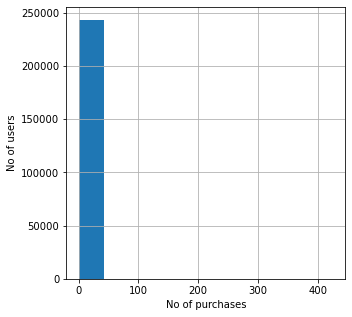

count    243404.000000
mean          2.160084
std           4.162927
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         425.000000
Name: No_of_products_purchased, dtype: float64


In [22]:

plt.figure(figsize=(5,5))
purchases['No_of_products_purchased'].hist()
plt.xlabel('No of purchases')
plt.ylabel('No of users')
plt.show()
print(purchases['No_of_products_purchased'].describe())

   We can see that majority of the users purchased only 1 product. Maximum number of product purchased by a single user is 425

# Analysis on HelpfulnessNumerator and HelpfulnessDenominator

- Helpfulness Numerator: Number of users who found the review helpful
- Helpfulness Denominator: Number of users who indicated whether they found the review helpful or not

In [23]:
# reviews_dff[reviews_dff['HelpfulnessNumerator'] > reviews_dff['HelpfulnessDenominator']]

# It was also seen that in two rows given below the value of HelpfulnessNumerator is greater than HelpfulnessDenominator which is not practically possible hence these two rows too are removed from calcualtions

# reviews_dff = reviews_dff[reviews_dff['HelpfulnessNumerator'] <= reviews_dff['HelpfulnessDenominator']]
# reviews_dff.shape

# #Checking to see how much % of data still remains
# print(f'Remaining data is {((reviews_dff.shape[0]*1.0)/(reviews_df.shape[0]*1.0))*100}')

# Preprocessing Text data

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords

In [24]:
reviews_dff

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Helpful %,% Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,-1.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,-1.0,Empty
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,1,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Positive,-1.0,Empty
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,0,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,Negative,-1.0,Empty
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,1,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Positive,1.0,80-100%
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,1,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Positive,1.0,80-100%


In [25]:
# df['text'] = df['Summary'] + df['Text']
reviews_dff['text'] = reviews_dff['Text']

reviews_dff

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Helpful %,% Upvote,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,1.0,80-100%,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,-1.0,Empty,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,1.0,80-100%,This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,1.0,80-100%,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,-1.0,Empty,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,1,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Positive,-1.0,Empty,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,0,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,Negative,-1.0,Empty,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,1,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Positive,1.0,80-100%,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,1,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Positive,1.0,80-100%,These are the BEST treats for training and rew...


In [26]:
# replacing some phrases like won't with will not

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])



preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(reviews_dff['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    # removing html tags
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    # removing extra spaces and numbers
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    # removing non alphabels
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|████████████████████████████████████████████████████████████████████████| 525773/525773 [02:52<00:00, 3040.19it/s]


In [27]:
#combining required columns
reviews_dff['clean_text'] = preprocessed_reviews
reviews_dff = reviews_dff[['Time','clean_text','Score']]
#reseting index
reviews_dff = reviews_dff.reset_index(drop=True)
#saving processed file
reviews_dff.to_csv('processed_df.csv',index=False)

In [28]:
reviews_dff

,Time,clean_text,Score
0,1303862400,bought several vitality canned dog food produc...,1
1,1346976000,product arrived labeled jumbo salted peanuts p...,0
2,1219017600,confection around centuries light pillowy citr...,1
3,1307923200,looking secret ingredient robitussin believe f...,0
4,1350777600,great taffy great price wide assortment yummy ...,1
...,...,...,...
525768,1299628800,great sesame chicken good not better resturant...,1
525769,1331251200,disappointed flavor chocolate notes especially...,0
525770,1329782400,stars small give one training session tried tr...,1
525771,1331596800,best treats training rewarding dog good groomi...,1


In [29]:
df_processed = pd.read_csv('processed_df.csv')
print(df_processed.shape)
df_processed.head()

(525773, 3)


,Time,clean_text,Score
0,1303862400,bought several vitality canned dog food produc...,1
1,1346976000,product arrived labeled jumbo salted peanuts p...,0
2,1219017600,confection around centuries light pillowy citr...,1
3,1307923200,looking secret ingredient robitussin believe f...,0
4,1350777600,great taffy great price wide assortment yummy ...,1


## Creating WordCloud

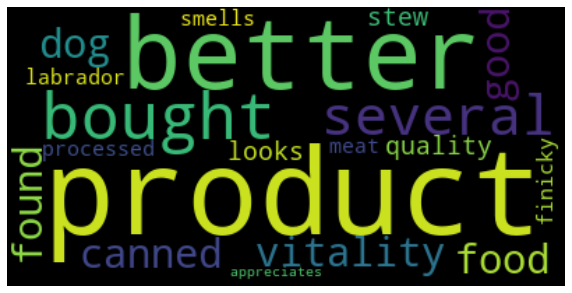

In [30]:
#start with one review
text = df_processed.clean_text[0]

# create and generate wordcloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize = [10,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

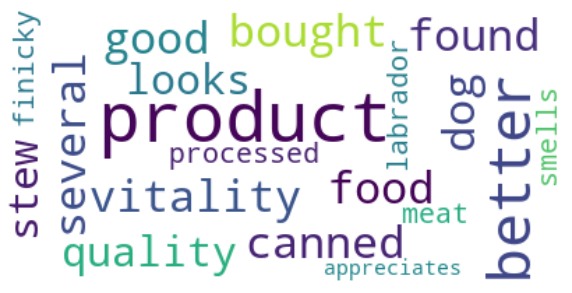

In [31]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=[10,7])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [32]:
review_one = " ".join(review for review in reviews_dff[reviews_dff['Score']==1].clean_text)
review_zero = " ".join(review for review in reviews_dff[reviews_dff['Score']==0].clean_text)

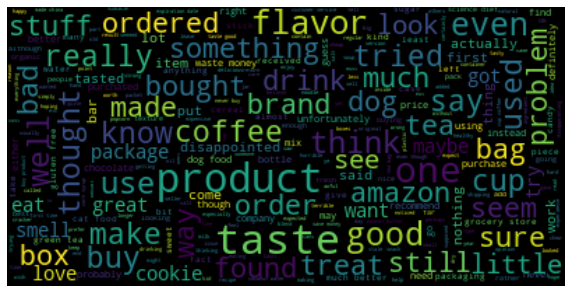

In [33]:
worldcloud_zero = WordCloud(background_color='Black',max_words=1000,max_font_size=30).generate(review_zero)

# Display the generated image:
plt.figure(figsize=[10,7])
plt.imshow(worldcloud_zero, interpolation='bilinear')
plt.axis("off")
plt.show()

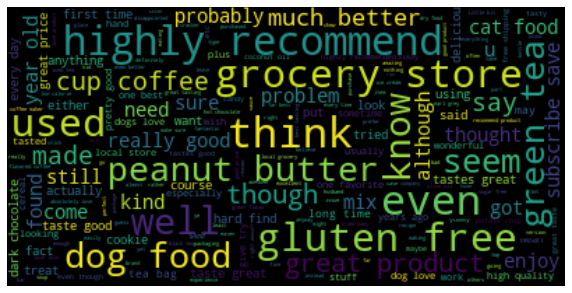

In [34]:
worldcloud_one = WordCloud(background_color='Black',max_words=1000,max_font_size=30).generate(review_one)

# Display the generated image:
plt.figure(figsize=[10,7])
plt.imshow(worldcloud_one, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
#one row is empty.we will drop it
# df = df.dropna(axis=0)
# df.shape

reviews_dff.isnull().sum()

Time          0
clean_text    0
Score         0
dtype: int64

We are considering <b>Time</b> beacuse our reviews are developed over time.So splitting based on that makes more sense

In [38]:
reviews_dff

,Time,clean_text,Score
517475,1315785600,item arrived time good good adds touch coconut...,1
177455,1240876800,tried many varieties k cups one far favorite s...,1
368876,1327881600,appear pretty healthy online taste test review...,1
260418,1268438400,year old like cereal trying avoid much dairy n...,1
353455,1317340800,cats get tgus fir breajfast tget syre ti ket n...,1
...,...,...,...
148037,1345939200,use cooking want enhanced flavor dish use seas...,1
215479,1288569600,hard find stores sweet sour enough wish flavor...,1
86130,1249603200,cereal box something missing know prices risin...,0
486596,1309737600,tried first time supermarket never found glad ...,1


In [37]:
#sampling 100k points 
# df = df.sample(100000,random_state=100)

reviews_dff = reviews_dff.sample(100000,random_state=100)

In [40]:
#sortimg based on time
# df['Time'] = pd.to_datetime(df['Time'],unit='s')
# df = df.sort_values('Time')
# df = df.reset_index(drop=True)

reviews_dff['Time'] = pd.to_datetime(reviews_dff['Time'], unit ='s')
reviews_dff = reviews_dff.sort_values('Time')
reviews_dff = reviews_dff.reset_index(drop=True)

Now we will split the data to train,cv and test

In [42]:
#splitting data to train.cv and test
from sklearn.model_selection import train_test_split
x = reviews_dff['clean_text']
y = reviews_dff['Score']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=100)
# X_tr,X_cv,y_tr,y_cv = train_test_split(X_train,y_train,test_size=0.3,stratify=y_train,random_state=100)
print(f'shape of X_train is {X_train.shape}')
print(f'shape of X_test is {X_test.shape}')
print(f'shape of y_train is {y_train.shape}')
print(f'shape of y_test is {y_test.shape}')

shape of X_train is (70000,)
shape of X_test is (30000,)
shape of y_train is (70000,)
shape of y_test is (30000,)


In [ ]:
# np.save('saved_feats/X_train', X_train)
# np.save('saved_feats/y_train', y_train)
# np.save('saved_feats/X_test', X_test)
# np.save('saved_feats/y_test', y_test)

## Bag of words

In [43]:
bow = CountVectorizer()
bow.fit(X_train)
X_train_bow = bow.transform(X_train)
X_test_bow = bow.transform(X_test)
bow_features = bow.get_feature_names()

print('shape of X_train_bow is {}'.format(X_train_bow.get_shape()))
print('shape of X_test_bow is {}'.format(X_test_bow.get_shape()))

shape of X_train_bow is (70000, 47862)
shape of X_test_bow is (30000, 47862)


# Machine Learning methods

## Logistic regression

In [48]:
vect = CountVectorizer(min_df= 5, ngram_range= (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

95854

In [50]:
logmodel = LogisticRegression()
logmodel.fit(X_train_vectorized, y_train)
 
predictions = logmodel.predict(vect.transform(X_test))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

C:\Users\Pratik Mulye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.85      0.77      0.81      4723
           1       0.96      0.98      0.97     25277

    accuracy                           0.94     30000
   macro avg       0.91      0.87      0.89     30000
weighted avg       0.94      0.94      0.94     30000

[[ 3660  1063]
 [  631 24646]]
0.9435333333333333


<b>checking confusion matrix

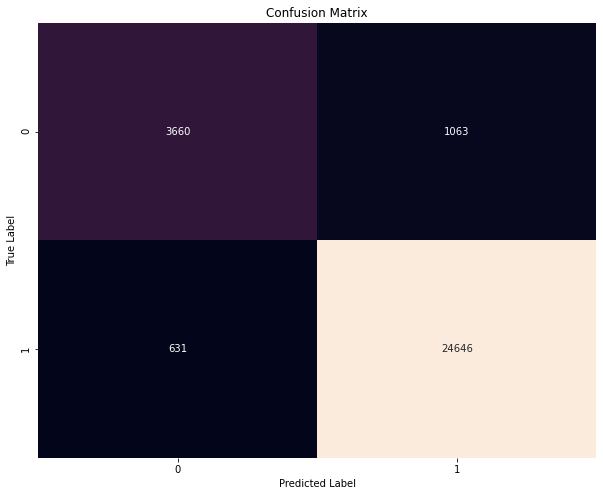

In [55]:
conf_matr = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matr,annot=True,cbar=False, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

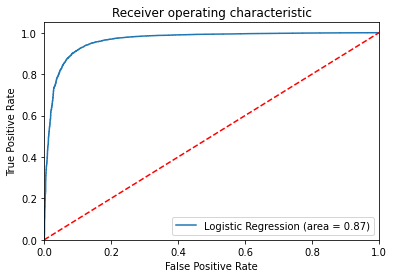

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [67]:
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8749838911684703


## Decision Tree

In [72]:
#Decision Tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train_vectorized, y_train)
predictions1 = dt.predict(vect.transform(X_test))

In [73]:
print('AUC: ', roc_auc_score(y_test, predictions1))

AUC:  0.7641405553379417


Text(0.5, 1.0, 'Confusion Matrix')

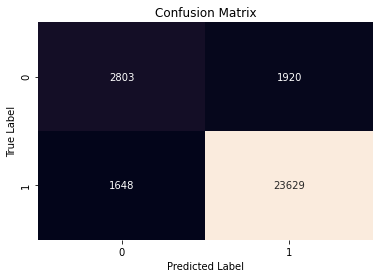

In [74]:
conf_matr_dt = confusion_matrix(y_test, predictions1)

sns.heatmap(conf_matr_dt,annot=True,cbar=False, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

## Random Forest

In [76]:
#Random Forest
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train_vectorized, y_train)
predictions2 = rf.predict(vect.transform(X_test))

In [77]:
print('AUC: ', roc_auc_score(y_test, predictions2))

AUC:  0.6948423745233115


Text(0.5, 1.0, 'Confusion Matrix')

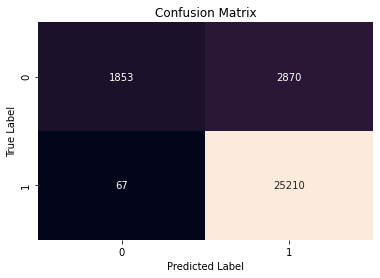

In [79]:
conf_matr_rf = confusion_matrix(y_test, predictions2)
sns.heatmap(conf_matr_rf,annot=True,cbar=False, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')